In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [31]:
# Function to load and scale the dataset
def load_and_scale_data(filepath):
    data = pd.read_csv(filepath)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.values)
    return pd.DataFrame(data_scaled, columns=data.columns), scaler 


In [32]:
# Function to create sequences for LSTM input
def create_sequences(data, sequence_length, target_index):
    X, y = [], []
    data = data.values if isinstance(data, pd.DataFrame) else data  # Ensure data is a NumPy array
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), :])
        y.append(data[i + sequence_length, target_index])
    return np.array(X), np.array(y)

In [ ]:
# Prepare the data
def prepare_data(data_scaled, sequence_length, target_column='Price'):
    target_index = data_scaled.columns.get_loc(target_column)
    X, y = create_sequences(data_scaled, sequence_length, target_index)
    split = int(0.8 * len(X))
    return X[:split], y[:split], X[split:], y[split:]


In [ ]:
filepath = 'data_preprocessed_with_all_sectors.csv'
data_scaled, scaler = load_and_scale_data(filepath)
sequence_length = 10
X_train, y_train, X_test, y_test = prepare_data(data_scaled, sequence_length)


In [35]:
# Build a model with Bidirectional LSTM
def build_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [37]:
# Load data
filepath = 'data_preprocessed_with_all_sectors.csv'  # Update with your file path
data_scaled, scaler = load_and_scale_data(filepath)

# Prepare data
sequence_length = 10
X_train, y_train, X_test, y_test = prepare_data(pd.DataFrame(data_scaled), sequence_length)

# Build and train model
model = build_model((sequence_length, data_scaled.shape[1]))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)


2025-02-05 22:39:40.783381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-05 22:39:40.784900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-05 22:39:40.785437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2025-02-05 22:39:40.989478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2025-02-05 22:39:41.008416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-05 22:39:41.009309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

 7/10 [====================>.........] - ETA: 0s - loss: 1.1220 

2025-02-05 22:39:43.807440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-05 22:39:43.808097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-05 22:39:43.808720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 3s 78ms/step - loss: 0.9529 - val_loss: 2.2840 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.8711 - val_loss: 2.2876 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.8242 - val_loss: 2.2975 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.7871 - val_loss: 2.2902 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.7344 - val_loss: 2.2793 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6737 - val_loss: 2.2858 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6489 - val_loss: 2.2843 - lr: 0.0010
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6904 - val_loss: 2.3216 - lr: 0.0010
Epoch 9/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5586 - val_loss: 2.3204 - lr: 0.

2025-02-05 22:40:54.874185: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-05 22:40:54.874781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-05 22:40:54.875626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 1s 2ms/step
Test MSE: 0.010452389102629933
Test MAE: 0.08044421125003573
Test MAPE: 408.0069807401128%


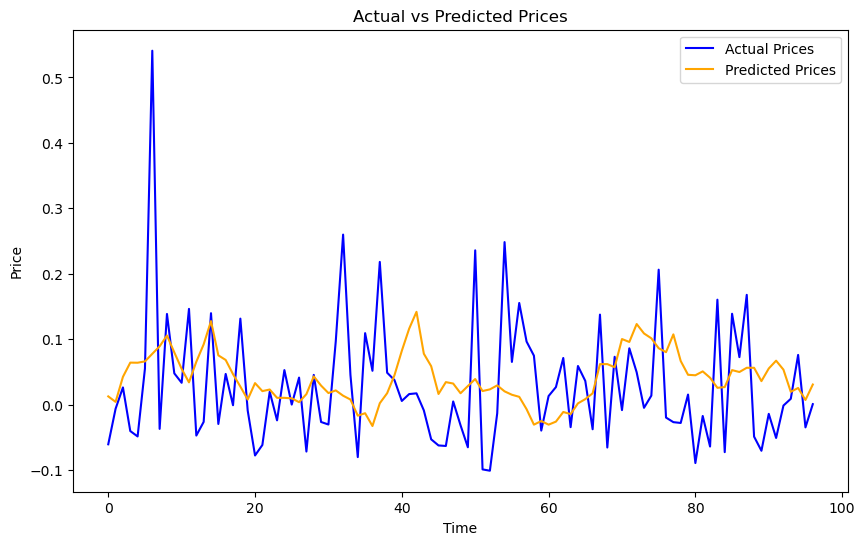

In [38]:
# Predict on test data
y_pred = model.predict(X_test)

# Ensure predictions and actual values are scaled back to the original scale if data was scaled
y_pred_rescaled = scaler.inverse_transform([[0] * (X_test.shape[2] - 1) + [y] for y in y_pred.ravel()])[:, -1]
y_test_rescaled = scaler.inverse_transform([[0] * (X_test.shape[2] - 1) + [y] for y in y_test])[:, -1]

# Calculate evaluation metrics
mse = np.mean((y_test_rescaled - y_pred_rescaled) ** 2)
mae = np.mean(np.abs(y_test_rescaled - y_pred_rescaled))
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test MAPE: {mape}%")

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Save model
model.save('lstm_bidirectional_model.h5')
print("Model saved as 'lstm_bidirectional_model.h5'.") 

# Reload the model
from tensorflow.keras.models import load_model
reloaded_model = load_model('lstm_multivariate_model.h5')
print("Model reloaded successfully.")

Model saved as 'lstm-bidirectional-model.h5'.
Model reloaded successfully.


2025-02-05 23:19:27.827011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-05 23:19:27.827916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-05 23:19:27.828405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus